In [218]:
from gensim.models import FastText
from tqdm import tqdm
import logging
import csv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from gensim import models
import numpy as np
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler

In [9]:
binpath = 'D:Applications/Fasttext/cc.ko.300.bin.gz'

ko_model = models.fasttext.load_facebook_model(binpath)

In [232]:
file_path = 'D:\KAM-LR\정서데이터ML_0224.csv'
df = pd.read_csv(file_path, sep=',')
df = df[['ID','Positive experience', 'Negative experience','Agree_M','Con_M','Extra_M','Neuro_M','Open_M','PA1','PA2','PA3','PA4','PA5',
         'PA1score','PA2score','PA3score','PA4score','PA5score','NA1','NA2','NA3','NA4','NA5','NA1score','NA2score','NA3score','NA4score','NA5score']]

In [233]:
df = df.dropna(how='all')

In [234]:
df

ID                                Positive experience  \
0        1.0                   내가 2년동안 전우들과 동고동락한 부대에서 전역식을 한 일   
1        2.0  유학시절에 만났던 친구가 2년 만에 한국을 방문하여 관광도 하고 친구들도 보여주고 ...   
2        3.0              한달전에 공모했던 기업체의 공모전 예선안에 뽑힌 경험이 긍정적이었음   
3        4.0     영화관에서 영화를 보았는데 영화가 재미있었습니다, 영화관 근처 음식도 맛있었습니다.   
4        5.0      퇴근 후 홈트를 시작했는데 근육도 잡히고 살도 빠졌다 . 매일 하는데 뿌듯하다 .   
...      ...                                                ...   
4384  4385.0      일을 할 때에 업무에 대한 실수가 있었는데 상급자의 도움으로 처리할 수 있었다.    
4385  4386.0  좋아하는 사람 또는 다른 분야의 업무를 하는 사람들과 생각지 못한 대화를 통해서 새...   
4386  4387.0                    그냥 다이어트 성공 바다보러간거 맛있는거 먹은거 기차여행   
4387  4388.0  1. 친구생일파티 / 빕스에서 밥을 대접하고, 축하를 해주었음 2. 해외여행 / 호...   
4388  4389.0                 영화관에서 가족과 영화를 본 시간이 재밌고 즐거웠던 시간이었다   

                                    Negative experience   Agree_M     Con_M  \
0                       전역을 하고 복학을 하니 학교에 아는 사람이 거의 없었다  3.000000  3.000000   
1             온 식구가 모여 오랜만에 식사를 하는 자리에서 스트레스를 받아 울었던 일.  4.000000  4.000000   
2                        감기에 걸려서 몸이 매우 좋지 않고 낫지도 않았던 경험  2.333333  3.333333   
3      아버지께 뺨을 맞았고 화가 나서 저도 아베지께 대들었습니다. 그리고 집에서 나왔습니다.  3.000000  3.666667   
4     회사에 동기가 있는데 나보다 나이도 많은데 입사 동기면서 업무 지시를 자꾸 하고 쎄...  3.666667  4.666667   
...                                                 ...       ...       ...   
4384              회사 내에서 업무 실수를 해서 이를 처리하는데 시간이 좀 걸렸다.   3.000000  4.000000   
4385                 남의것을 탐하는 사람들의 불필요한 욕심들.....하 진짜 싫어  3.333333  3.000000   
4386            부모님과 싸움 돈잃어버림 머 그다지 없는데 잘모르겠다 사고싶은옷 못산거  2.333333  2.666667   
4387      1. 싸움 / 남자친구와 소리를 지르며 싸움 2. 상사와 업무스타일이 맞지 않음   3.666667  4.666667   
4388                양말을 잃어버려서 집에서 30분 이상을 찾아헤맸지만 찾지 못했다  2.666667  3.666667   

       Extra_M   Neuro_M    Open_M  PA1     PA2  ...   NA1   NA2  NA3  NA4  \
0     1.666667  2.000000  2.000000   기쁨   시원섭섭함  ...    슬픔   씁슬함  무료함  NaN   
1     1.666667  2.000000  2.000000  즐거움      피로  ...   수치심   자괴감   슬픔  외로움   
2     3.000000  3.333333  4.333333   기쁨     놀라움  ...    슬픔    힘듬   아픔   추움   
3     2.666667  3.000000  4.000000   행복     즐거움  ...    분노    원망   슬픔  NaN   
4     2.666667  3.333333  5.000000  뿌듯함  자존감 상승  ...   거슬림   짜증남   불쾌  NaN   
...        ...       ...       ...  ...     ...  ...   ...   ...  ...  ...   
4384  2.666667  3.000000  2.666667  고마움      긍정  ...    우울    당황   슬픔  NaN   
4385  3.000000  3.333333  3.333333  새로움      반성  ...    짜증  어이없음   화남   분노   
4386  2.666667  2.333333  2.666667   기쁨     개운함  ...   아쉬움   억울함   화남  NaN   
4387  4.333333  2.000000  5.000000   행복     즐거움  ...    짜증    분노   답답  NaN   
4388  2.000000  4.333333  2.666667  재밌다     즐겁다  ...  짜증난다   화난다  아깝다  NaN   

       NA5  NA1score  NA2score  NA3score NA4score NA5score  
0      NaN       3.0       4.0       3.0      NaN      NaN  
1       경멸       3.0       5.0       5.0      3.0      4.0  
2      쓸쓸함       4.0       5.0       5.0      5.0      3.0  
3      NaN       4.0       4.0       4.0      NaN      NaN  
4      NaN       1.0       1.0       1.0      NaN      NaN  
...    ...       ...       ...       ...      ...      ...  
4384   NaN       1.0       3.0       2.0      NaN      NaN  
4385  재수없음       5.0       4.0       5.0      5.0      5.0  
4386   NaN       3.0       3.0       2.0      NaN      NaN  
4387   NaN       4.0       4.0       5.0      NaN      NaN  
4388   NaN       5.0       4.0       3.0      NaN      NaN  

[4389 rows x 28 columns]

In [235]:
my_dict = {}
for i, row in df.iterrows():
        my_dict[df.at[i,'ID']] = [(str(df.at[i,'PA1']),df.at[i,'PA1score']),(str(df.at[i,'PA2']),df.at[i,'PA2score']),(str(df.at[i,'PA3']),df.at[i,'PA3score']),(str(df.at[i,'PA4']),df.at[i,'PA4score']),(str(df.at[i,'PA5']),df.at[i,'PA5score'])]
for i, row in df.iterrows():
        my_dict[df.at[i,'ID']+4389] = [(str(df.at[i,'NA1']),df.at[i,'NA1score']),(str(df.at[i,'NA2']),df.at[i,'NA2score']),(str(df.at[i,'NA3']),df.at[i,'NA3score']),(str(df.at[i,'NA4']),df.at[i,'NA4score']),(str(df.at[i,'NA5']),df.at[i,'NA5score'])]

In [236]:
print(my_dict)

{1.0: [('기쁨', 5.0), ('시원섭섭함', 3.0), ('황홀함', 4.0), ('nan', nan), ('nan', nan)], 2.0: [('즐거움', 4.0), ('피로', 5.0), ('아쉬움', 3.0), ('재밌음', 4.0), ('뿌듯함', 3.0)], 3.0: [('기쁨', 3.0), ('놀라움', 4.0), ('좋음', 3.0), ('행복', 3.0), ('들뜸', 4.0)], 4.0: [('행복', 3.0), ('즐거움', 3.0), ('신남', 3.0), ('nan', nan), ('nan', nan)], 5.0: [('뿌듯함', 2.0), ('자존감 상승', 2.0), ('개운함', 1.0), ('nan', nan), ('nan', nan)], 6.0: [('뿌듯', 4.0), ('기쁨', 4.0), ('행복', 5.0), ('nan', nan), ('nan', nan)], 7.0: [('재미있다', 4.0), ('새롭다', 3.0), ('익숙하다', 2.0), ('nan', nan), ('nan', nan)], 8.0: [('행복', 5.0), ('살만하다', 5.0), ('충족', 5.0), ('nan', nan), ('nan', nan)], 9.0: [('행복', 5.0), ('편안함', 5.0), ('즐거움', 5.0), ('사랑스러움', 5.0), ('느긋함', 5.0)], 10.0: [('고마움', 4.0), ('재미남', 4.0), ('친절함', 5.0), ('nan', nan), ('nan', nan)], 11.0: [('뿌듯', 4.0), ('알차다', 5.0), ('보람', 4.0), ('nan', nan), ('nan', nan)], 12.0: [('행복', 3.0), ('성취감', 5.0), ('설레임', 5.0), ('자랑스러움', 5.0), ('nan', nan)], 13.0: [('여유로움', 3.0), ('행복함', 5.0), ('기쁨', 5.0), ('싱그러움', 5.0), ('들뜬', 5.0)],

In [237]:
for key, val in my_dict.items():
    if val[3][0] == 'nan':
        my_dict[key] = val[:2]
    if val[4][0] == 'nan':
        my_dict[key] = val[:3]
print(my_dict)


{1.0: [('기쁨', 5.0), ('시원섭섭함', 3.0), ('황홀함', 4.0)], 2.0: [('즐거움', 4.0), ('피로', 5.0), ('아쉬움', 3.0), ('재밌음', 4.0), ('뿌듯함', 3.0)], 3.0: [('기쁨', 3.0), ('놀라움', 4.0), ('좋음', 3.0), ('행복', 3.0), ('들뜸', 4.0)], 4.0: [('행복', 3.0), ('즐거움', 3.0), ('신남', 3.0)], 5.0: [('뿌듯함', 2.0), ('자존감 상승', 2.0), ('개운함', 1.0)], 6.0: [('뿌듯', 4.0), ('기쁨', 4.0), ('행복', 5.0)], 7.0: [('재미있다', 4.0), ('새롭다', 3.0), ('익숙하다', 2.0)], 8.0: [('행복', 5.0), ('살만하다', 5.0), ('충족', 5.0)], 9.0: [('행복', 5.0), ('편안함', 5.0), ('즐거움', 5.0), ('사랑스러움', 5.0), ('느긋함', 5.0)], 10.0: [('고마움', 4.0), ('재미남', 4.0), ('친절함', 5.0)], 11.0: [('뿌듯', 4.0), ('알차다', 5.0), ('보람', 4.0)], 12.0: [('행복', 3.0), ('성취감', 5.0), ('설레임', 5.0)], 13.0: [('여유로움', 3.0), ('행복함', 5.0), ('기쁨', 5.0), ('싱그러움', 5.0), ('들뜬', 5.0)], 14.0: [('뿌듯함', 3.0), ('기쁨', 2.0), ('성취감', 3.0)], 15.0: [('행복', 5.0), ('즐거움', 5.0), ('소속감', 4.0)], 16.0: [('설레임', 1.0), ('기대', 1.0), ('낯설음', 3.0)], 17.0: [('기쁨', 3.0), ('성취감', 3.0), ('즐거움', 4.0), ('자신감', 3.0), ('자존감', 3.0)], 18.0: [('뿌듯함', 5.0), ('기쁨', 4

In [238]:
path = 'C:/Windows/Fonts/NGULIM.ttf'
fontprop = fm.FontProperties(fname=path,size=20)

In [239]:
words = []
for key, val in my_dict.items():
    for i in val:
        words.append(i[0])
print(words)

['기쁨', '시원섭섭함', '황홀함', '즐거움', '피로', '아쉬움', '재밌음', '뿌듯함', '기쁨', '놀라움', '좋음', '행복', '들뜸', '행복', '즐거움', '신남', '뿌듯함', '자존감 상승', '개운함', '뿌듯', '기쁨', '행복', '재미있다', '새롭다', '익숙하다', '행복', '살만하다', '충족', '행복', '편안함', '즐거움', '사랑스러움', '느긋함', '고마움', '재미남', '친절함', '뿌듯', '알차다', '보람', '행복', '성취감', '설레임', '여유로움', '행복함', '기쁨', '싱그러움', '들뜬', '뿌듯함', '기쁨', '성취감', '행복', '즐거움', '소속감', '설레임', '기대', '낯설음', '기쁨', '성취감', '즐거움', '자신감', '자존감', '뿌듯함', '기쁨', '자랑스러움', '뿌듯함', '행복함', '기쁨', '희열', '열광', '개이득', '기쁨', '즐거움', '성취감', '자신감', '만족감', '기쁨', '신남', '즐거움', '놀람', '신기함', '기쁨', '성취감', '기쁨', '달성감', '상쾌함', '뿌듯함', '여유로움', '즐거움', '새로움', '신남', '상쾌', '통쾌', '여유로움', '감탄', '흥미롭다', '신기하다', '희열', '환희', '열정', '기분이 좋음', '행복함', '뿌듯함', '좋음', '기쁨', '행복', '감탄', '대단', '놀라움', '부끄러움', '선함', '뿌듯함', '즐거움', '행복함', '행복', '성취감', '책임감', '배움', '뿌듯함', '궁금함', '홀가분', '기쁨', '짜릿', '뿌듯하다', '상쾌하다', '찝찝하다', '설렘', '신남', '즐거움', '만족', '편안함', '행복', '설렘', '감동', '황홀', '기쁨', '즐거움', '고양됨', '행복', '즐거움', '휴식', '좋다', '좋았다', '신기했다', '새로웠다', '뿌듯', '기쁨', '감사', '짜릿하다',

In [240]:
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])

In [241]:
print(xys)

[[ 1.45324436 -1.33441269]
 [-0.86466193 -0.02234849]
 [-0.63357891 -0.0578504 ]
 ...
 [-0.73612305  0.15483553]
 [-0.58100944  0.14730415]
 [-0.73135465  0.12820882]]


In [242]:
print(my_dict)

{1.0: [('기쁨', 5.0), ('시원섭섭함', 3.0), ('황홀함', 4.0)], 2.0: [('즐거움', 4.0), ('피로', 5.0), ('아쉬움', 3.0), ('재밌음', 4.0), ('뿌듯함', 3.0)], 3.0: [('기쁨', 3.0), ('놀라움', 4.0), ('좋음', 3.0), ('행복', 3.0), ('들뜸', 4.0)], 4.0: [('행복', 3.0), ('즐거움', 3.0), ('신남', 3.0)], 5.0: [('뿌듯함', 2.0), ('자존감 상승', 2.0), ('개운함', 1.0)], 6.0: [('뿌듯', 4.0), ('기쁨', 4.0), ('행복', 5.0)], 7.0: [('재미있다', 4.0), ('새롭다', 3.0), ('익숙하다', 2.0)], 8.0: [('행복', 5.0), ('살만하다', 5.0), ('충족', 5.0)], 9.0: [('행복', 5.0), ('편안함', 5.0), ('즐거움', 5.0), ('사랑스러움', 5.0), ('느긋함', 5.0)], 10.0: [('고마움', 4.0), ('재미남', 4.0), ('친절함', 5.0)], 11.0: [('뿌듯', 4.0), ('알차다', 5.0), ('보람', 4.0)], 12.0: [('행복', 3.0), ('성취감', 5.0), ('설레임', 5.0)], 13.0: [('여유로움', 3.0), ('행복함', 5.0), ('기쁨', 5.0), ('싱그러움', 5.0), ('들뜬', 5.0)], 14.0: [('뿌듯함', 3.0), ('기쁨', 2.0), ('성취감', 3.0)], 15.0: [('행복', 5.0), ('즐거움', 5.0), ('소속감', 4.0)], 16.0: [('설레임', 1.0), ('기대', 1.0), ('낯설음', 3.0)], 17.0: [('기쁨', 3.0), ('성취감', 3.0), ('즐거움', 4.0), ('자신감', 3.0), ('자존감', 3.0)], 18.0: [('뿌듯함', 5.0), ('기쁨', 4

In [243]:
a = 0
for key, val in my_dict.items():
    new_arr = []
    for i in val:
        arr = np.hstack((xys[a],i[1]))
        new_arr.append(arr)
        a += 1
    new_arr = np.array(new_arr)
    my_dict[key] = new_arr

In [244]:
print(my_dict)

{1.0: array([[ 1.45324436, -1.33441269,  5.        ],
       [-0.86466193, -0.02234849,  3.        ],
       [-0.63357891, -0.0578504 ,  4.        ]]), 2.0: array([[-0.34567107, -0.54077752,  4.        ],
       [ 0.44068106,  0.29069762,  5.        ],
       [-0.41942903, -0.08161415,  3.        ],
       [-0.50907697,  0.08930648,  4.        ],
       [-0.41210227, -0.17074145,  3.        ]]), 3.0: array([[ 1.45324436, -1.33441269,  3.        ],
       [-0.27426759, -0.05995055,  4.        ],
       [ 0.08697131,  0.53067864,  3.        ],
       [ 0.90452572, -1.02850496,  3.        ],
       [ 0.26018763,  0.10329492,  4.        ]]), 4.0: array([[ 0.90452572, -1.02850496,  3.        ],
       [-0.34567107, -0.54077752,  3.        ],
       [ 0.50388783, -0.09399971,  3.        ]]), 5.0: array([[-0.41210227, -0.17074145,  2.        ],
       [-0.81516263, -0.03784177,  2.        ],
       [-0.8046829 , -0.03214697,  1.        ]]), 6.0: array([[-0.05561728, -0.10147267,  4.        ],

In [245]:
def centeroidnp(arr):
    length = arr.shape[0]
    sum_x = np.sum(arr[:, 0]*arr[:, 2])
    sum_y = np.sum(arr[:, 1]*arr[:, 2])
    return sum_x/length, sum_y/length

In [246]:
emo_list = []

for key, value in my_dict.items():
    emo_list.append(centeroidnp(value))

print(emo_list)

[(0.7126401241480513, -2.323503507262577), (-0.7420361630377645, -0.22189257326018108), (1.455580866217917, -1.064667917109252), (1.0627424799415186, -1.6632821912249938), (-1.0864042406323047, -0.14977113590381705), (3.3710456425131845, -3.628688758592997), (-2.2407348729213292, -0.25225989010474886), (0.8175068144602774, -1.7096254520367793), (-1.2080854308951658, -2.05826459867646), (-2.323665436254735, -0.10409621951253027), (-0.32265312841260396, -0.8325690498276702), (-0.11106265129038258, -1.66225355436786), (0.3836453538953801, -1.6663997115288414), (0.20862524839812155, -1.2480719375927574), (0.4741674733358357, -2.8990564649338952), (-0.4950419383471309, -0.013224724612758488), (-0.01181841010770115, -1.3920176790725736), (0.2776107496558322, -2.1487071816648937), (0.7450704322454937, -2.190617282962726), (0.8821381625126481, -1.5917301551544836), (-1.4410663797464327, -0.6307441178450656), (2.5178059116614033, -3.2506499659760877), (2.1611949281193, -0.9672066962910483), (0.

In [247]:
emo_arr = np.array(emo_list)
print(emo_arr)

[[ 0.71264012 -2.32350351]
 [-0.74203616 -0.22189257]
 [ 1.45558087 -1.06466792]
 ...
 [-0.34826311  0.12353781]
 [ 3.15245229  4.23412934]
 [-2.73290565  0.58267356]]


In [248]:
print(len(emo_arr))

8778


In [249]:
sc = StandardScaler()
sc.fit(emo_arr)
emo_arr = sc.transform(emo_arr)

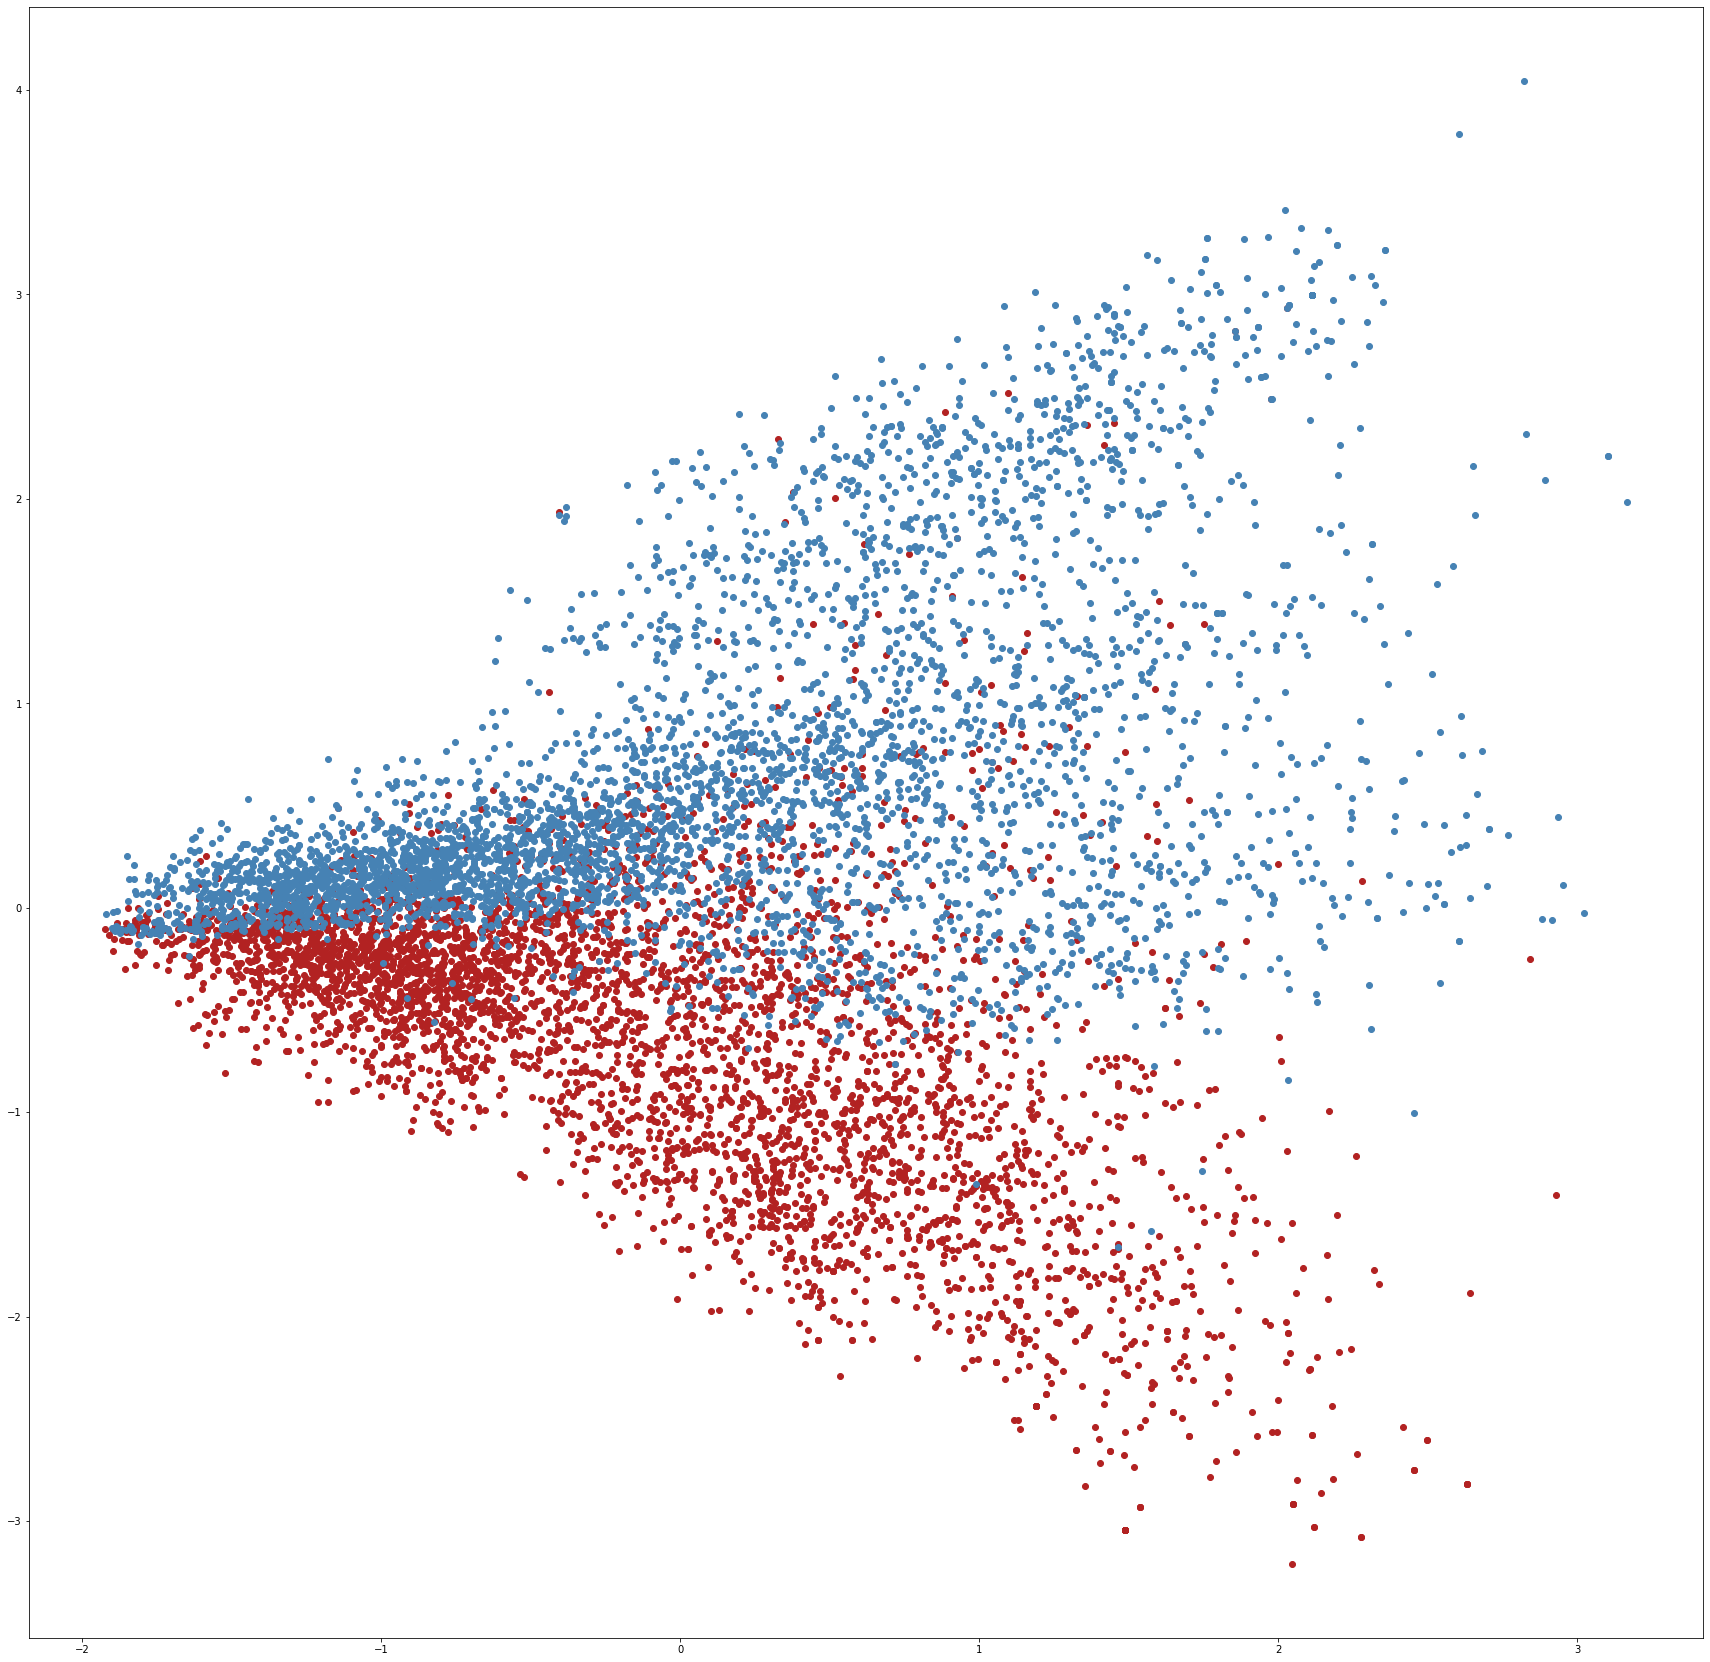

In [264]:
xs = emo_arr[:4389,0]
ys = emo_arr[:4389,1]
xz = emo_arr[4389:,0]
yz = emo_arr[4389:,1]
plt.figure(figsize=(30, 30))
plt.scatter(xs, ys, marker='o',c='#B22222')
plt.scatter(xz, yz, marker='o',c='#4682B4')

In [213]:
kmeans_plus = KMeans(n_clusters=4, init="k-means++")
pred_plus = kmeans_plus.fit_predict(emo_arr)

In [215]:
df['char_type']=pred_plus
df = df.sort_values(by=['char_type'],axis=0)
df

ID                                Positive experience  \
2846  2847.0            매일 회사만 다니다가 취미생활을 맘먹고 하니 활력이 생기게 되었습니다.   
1489  1490.0                    딱히 느낀것은없습니다 단지 아르바이트하면서 응원받는정도?   
1480  1481.0  코엑스 워먼테크메이커(WTM)에서 웹개발/디자인 등에 관련한 많은 여성들의 강연을 ...   
1566  1567.0            생산시간단축. 재료절감시 그리고 생산캐파시간 스스로 채울때 기분 좋았음   
1677  1678.0  남자친구와 맛있는 음식을 먹고 벚꽃을 보러 구경간 것이다. 재미있는 사진을 많이 찍...   
...      ...                                                ...   
1066  1067.0  올리브영에서 알바릉 했는데 손님들이 친절하다고 말씀해 주시거나 도움을 줘서 고맙다고...   
2045  2046.0                   취업을 준비하고 있는데 지원한 직장 2곳에서 연락이 왔다!   
3463  3464.0                    지난달 정신적 힐링을 위해 혼자 2박3일 여행을 다녀왔다   
2416  2417.0  특별한 일이 없는 똑같은 일상의 반복으로 한끼를 먹어도 맛있게 먹고 강아지와 함께만...   
3370  3371.0               환자를 치료하고 눈에띄게 많이 호전되거나 컨디션이 좋다고 하였을때   

                                    Negative experience   Agree_M     Con_M  \
2846  남잔친구와 드라이브하면서 데이트를 하다가 약간의 다툼이 있었는데 놀라고 섭섭하고 속...  2.333333  3.333333   
1489                  알바하는데 진상손님이 앞에서 진상짓을 하고있을때가 짜증났다.  3.333333  2.333333   
1480  서점아르바이트를 하는데 남자 알바생들과 남자 점장이 여성혐오적이고 여성전반을 까내리...  2.333333  4.000000   
1566             개인미숙으로 인한 사고 작업부주의 근무태만으로 인한 개인적으로 실망함  4.000000  4.666667   
1677  남자친구와 다투어서 서로 말도 안하고 마음이 불편한 상태로 하루 종일을 보냈다. 화...  3.000000  3.333333   
...                                                 ...       ...       ...   
1066               같이 일하는 점장이 짜증나게 행동하고 본인 위주로 말하고 행동한것  3.666667  4.000000   
2045              요새 장사가 잘 안되신다는 부모님의 얘기를 듣고 있자니 너무 슬펐다  4.000000  4.000000   
3463                     집의 세무조사를 해결하기 위해 정신적 스트레스가 많았다  3.666667  5.000000   
2416               강아지가 노견이라 조금씩 아팠던일 일할때 손님과 트러블이 있었던일  3.666667  3.000000   
3370                  같이 근무하는 사람과 맞지 않을때 그로인해 의견충돌이 있을때  4.000000  4.000000   

       Extra_M   Neuro_M    Open_M         PA1           PA2  ...   NA2  \
2846  1.666667  3.666667  2.333333      활력이 생김        기분이 상쾌  ...   속상함   
1489  2.333333  3.666667  3.000000         좋았다          기운차다  ...  짜증나다   
1480  2.000000  3.666667  3.000000        벅차오름  가능성으로 꽉 찬 느낌  ...   속상함   
1566  2.333333  2.000000  2.333333  사수한테 칭찬들었음   인정받는 기분 이었음  ...  의욕저하   
1677  3.666667  2.333333  3.333333         기쁘다          행복하다  ...  화가난다   
...        ...       ...       ...         ...           ...  ...   ...   
1066  3.000000  2.333333  3.666667         행복함           성취감  ...    화남   
2045  3.333333  1.666667  4.000000         기대감            떨림  ...  힘이빠짐   
3463  4.666667  3.666667  2.333333        여유로움           편안함  ...   불안함   
2416  1.333333  2.000000  1.666667        평화로움           행복감  ...   불안함   
3370  3.000000  2.333333  3.333333          보람           뿌듯함  ...    분노   

         NA3  NA4  NA5  NA1score  NA2score  NA3score  NA4score NA5score  \
2846      놀람  짜증남  NaN       4.0       5.0       4.0       3.0      NaN   
1489   욕하고싶다  NaN  NaN       5.0       5.0       5.0       NaN      NaN   
1480    무기력함  NaN  NaN       5.0       3.0       3.0       NaN      NaN   
1566  스스로 실망  NaN  NaN       3.0       4.0       5.0       NaN      NaN   
1677    실망이다  NaN  NaN       4.0       4.0       3.0       NaN      NaN   
...      ...  ...  ...       ...       ...       ...       ...      ...   
1066     불쾌함  속상함  NaN       5.0       5.0       5.0       4.0      NaN   
2045   당황스러움  NaN  NaN       5.0       4.0       3.0       NaN      NaN   
3463     초조함  NaN  NaN       4.0       3.0       4.0       NaN      NaN   
2416      슬픔  NaN  NaN       4.0       4.0       3.0       NaN      NaN   
3370     피로감  NaN  NaN       4.0       4.0       4.0       NaN      NaN   

     char_type  
2846         0  
1489         0  
1480         0  
1566         0  
1677         0  
...        ...  
1066         3  
2045         3  
3463         3  
2416         3  
3370         3  

[4389 rows x 29 columns]

In [216]:
csv_list = []
for i, row in df.iterrows():
    csv_list.append([df.at[i, 'ID'],str(df.at[i, 'Positive experience']),str(df.at[i, 'PA1']),str(df.at[i, 'PA2']),
                     str(df.at[i, 'PA3']),str(df.at[i, 'PA4']),str(df.at[i, 'PA5']),df.at[i, 'PA1score'],
                     df.at[i, 'PA2score'],df.at[i, 'PA3score'],df.at[i, 'PA4score'],df.at[i, 'PA5score'],
                     df.at[i, 'Agree_M'],df.at[i, 'Con_M'],df.at[i, 'Extra_M'],df.at[i, 'Neuro_M'],df.at[i, 'Open_M']
                     ,df.at[i, 'char_type']])

f = open('D:\Jiyoon\emotion_type.csv', 'w', encoding='utf-8-sig',newline='')
wr = csv.writer(f)
wr.writerow(['ID','positive_experience','PA1','PA2','PA3','PA4','PA5','PA1score','PA2score','PA3score','PA4score','PA5score',
             'Agree_M','Con_M','Extra_M','Neuro_M','Open_M',"emotion_type"])
for i in range(len(csv_list)):
    wr.writerow([csv_list[i][0], csv_list[i][1], csv_list[i][2], csv_list[i][3], csv_list[i][4], csv_list[i][5]
                , csv_list[i][6], csv_list[i][7], csv_list[i][8], csv_list[i][9], csv_list[i][10], csv_list[i][11]
                , csv_list[i][12], csv_list[i][13], csv_list[i][14], csv_list[i][15], csv_list[i][16], csv_list[i][17]])

f.close()